## Assignment 1 
### \<Harsh Rathi> \<a1882311>

### 1. Reading datasets

In [1]:
import pandas as pd
import json
import re
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset
file_path = 'random_30000_hotel_reviews.JSON'

with open(file_path) as file:
    data_list = []
    for line in file:
        try:
            # Load each JSON object Line by line separately
            data = json.loads(line)
            #Extracting overall from ratings
            overall_rating = data['ratings']['overall']
            data['overall_rating']=overall_rating
            data_list.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            




In [2]:
# Converting the list of dictionaries to DataFrame
df = pd.DataFrame(data_list)

#combining"title" and "text" column to reviews
df['reviews'] = df['title'] + " " + df['text']
df_new = pd.DataFrame(df, columns=['reviews','overall_rating'])

In [3]:
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Spliting the dataset into training,development & testing
training_df = df_new.iloc[:10000]
development_df = df_new.iloc[10000:20000]
testing_df = df_new.iloc[20000:30000]

# Displaying few rows of development dataset
development_df.head()



# Function to clean and tokenize text
def clean_tokenize(text):
    text = re.sub(r'\W', ' ', text)  # Removing all non-aplhaphanumeric characters
    text = re.sub(r'\s+', ' ', text)  # Replacing multiple spaces with a single space
    return word_tokenize(text)  # Tokenize

# Apply the function to the review text

training_df['cleaned_review'] = training_df['reviews'].apply(clean_tokenize)
development_df['cleaned_review'] = development_df['reviews'].apply(clean_tokenize)
testing_df['cleaned_review'] = testing_df['reviews'].apply(clean_tokenize)

development_df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,reviews,overall_rating,cleaned_review
10000,“Nice hotel - great location” This was a nice ...,4.0,"[Nice, hotel, great, location, This, was, a, n..."
10001,“Perfect location and the room was generous in...,4.0,"[Perfect, location, and, the, room, was, gener..."
10002,"“Rude staff, extra charges, overall unimpressi...",2.0,"[Rude, staff, extra, charges, overall, unimpre..."
10003,"“Great location, would stay here again” Stayed...",4.0,"[Great, location, would, stay, here, again, St..."
10004,“Disappointed in Chicago” I stayed at the Alle...,3.0,"[Disappointed, in, Chicago, I, stayed, at, the..."


### 2. Exploratory Data Analysis (EDA)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


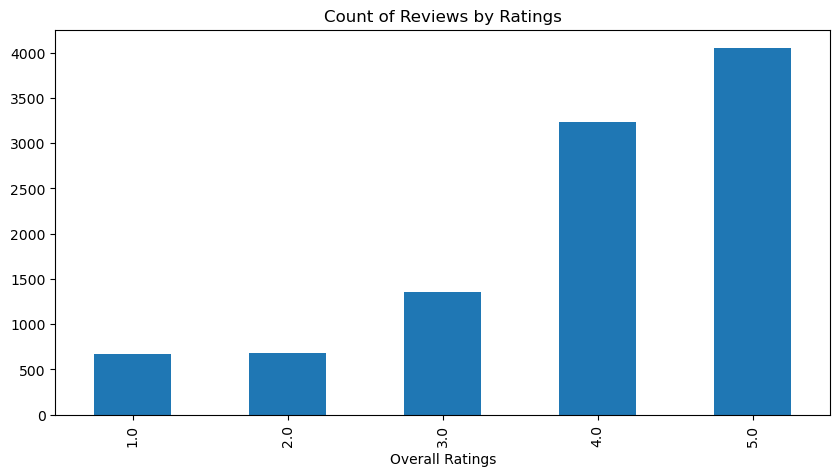

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
# counting no of entries according to the overall ratings
#development_df['overall_rating'].value_counts()

#plotting the graph on no of entries vs ratings
axiss=development_df['overall_rating'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Ratings',figsize=(10,5))
axiss.set_xlabel('Overall Ratings')
plt.show()


#Thus dividing the ratings into category of 
#positive (5&4 ratings), negative (1&2 ratings) and Netural (3 Rating).


In [5]:
# Map_sentiment function is used to divided the rating in 3 types positive(1) negative(-1) and neutral(0)
# Here if the overall hotel ratings >= 4 its positive if rating == 3 its neutral and ratings < 3 is negative

def map_sentiment(rating):
    if rating >= 4:
        return 1
    elif rating == 3:
        return 0
    else:
        return -1
    
# Apply map_sentiment function to 'overall_rating' column in development dataset
development_df['sentiment'] = development_df['overall_rating'].apply(lambda x: map_sentiment(x))

# Apply map_sentiment function to 'overall_rating' column in training dataset
training_df['sentiment'] = training_df['overall_rating'].apply(lambda x: map_sentiment(x))

# Apply map_sentiment function to 'overall_rating' column in testing dataset
testing_df['sentiment'] = testing_df['overall_rating'].apply(lambda x: map_sentiment(x))


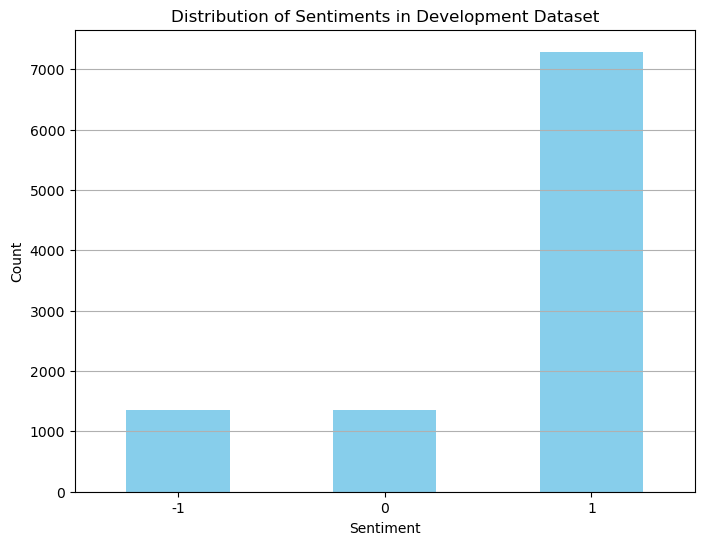

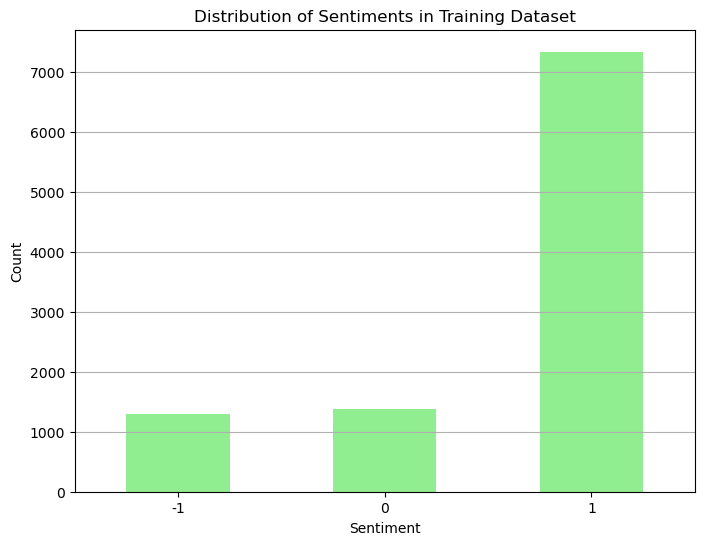

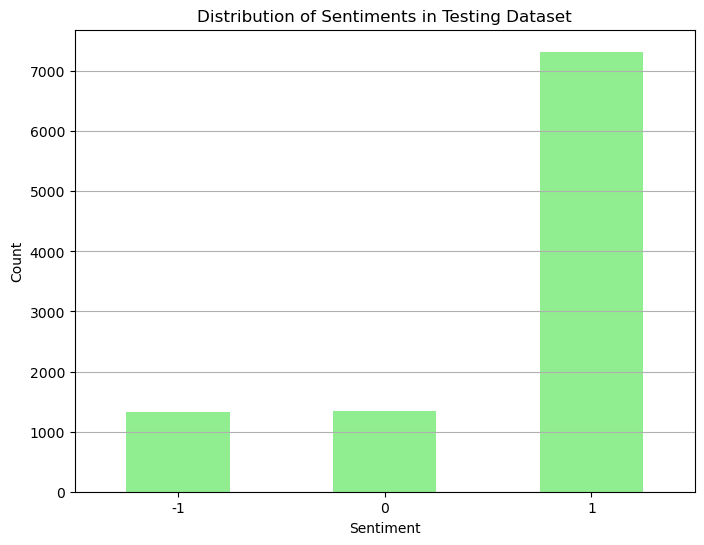

In [6]:
import matplotlib.pyplot as plt

# Plotting the distribution of sentiments in development dataset
plt.figure(figsize=(8, 6))
development_df['sentiment'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiments in Development Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1, 2], [-1, 0, 1], rotation=0)
plt.grid(axis='y')
plt.show()

# Plotting the distribution of sentiments in training dataset
plt.figure(figsize=(8, 6))
training_df['sentiment'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Sentiments in Training Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1, 2], [-1, 0, 1], rotation=0)
plt.grid(axis='y')
plt.show()

# Plotting the distribution of sentiments in training dataset
plt.figure(figsize=(8, 6))
testing_df['sentiment'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Sentiments in Testing Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1, 2], [-1, 0, 1], rotation=0)
plt.grid(axis='y')
plt.show()

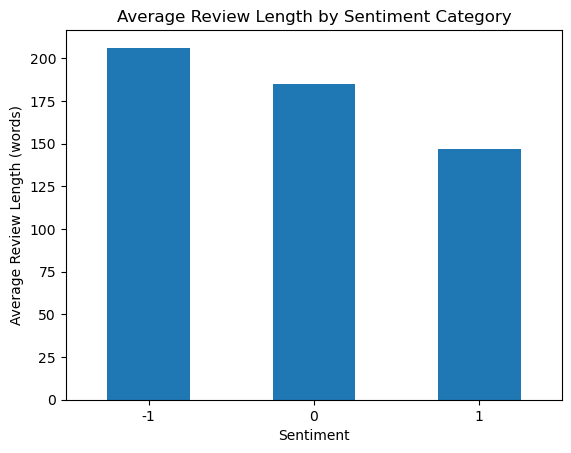

In [7]:
#  Calculate review lengths
development_df['review_length'] = development_df['cleaned_review'].apply(len)
# Compute average review length for each group
average_lengths = development_df.groupby('sentiment')['review_length'].mean()

# Visualization
average_lengths.plot(kind='bar')
plt.title('Average Review Length by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Average Review Length (words)')
plt.xticks(rotation=0)
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Extract index and values
sentiment_index = average_lengths.index
avg_review_length_values = average_lengths.values

# Compute the correlation between average review length and sentiment category
correlation = np.corrcoef(avg_review_length_values, [0, 1,2])[0, 1]  # Index 0 is for 'Negative', index 1 is for 'Positive'

print("Correlation between average review length and sentiment category:", correlation)

#A correlation coefficient of approx -1.0 means that there is a perfect negative correlation between the average review length and the sentiment category.
#development_df.head()


Correlation between average review length and sentiment category: -0.9872509631176816


In [9]:
from collections import Counter

def get_top_words_by_sentiment(reviews_df, sentiment, top_n=10):
    """
    This function returns the top N words for a given sentiment category.
    """
    # Filter reviews by sentiment
    sentiment_reviews = reviews_df[reviews_df['sentiment'] == sentiment]['cleaned_review']
    
    # Flatten the tokenized word lists
    all_words = [word for review in sentiment_reviews for word in review]
    
    # Count the occurrences of each word
    word_counts = Counter(all_words)
    
    # Sort words by frequency
    top_words = word_counts.most_common(top_n)
    
    return top_words

# Example usage
negative_top_words = get_top_words_by_sentiment(development_df, -1, 20)
neutral_top_words = get_top_words_by_sentiment(development_df, 0, 20)
positive_top_words = get_top_words_by_sentiment(development_df, 1, 20)

print("Top words in Negative Reviews:", negative_top_words)
print("Top words in Neutral Reviews:", neutral_top_words)
print("Top words in Positive Reviews:", positive_top_words)

# it is hard to see any difference as it consists of common words in it.
# we can try removing stopwords and some common words to see difference.

Top words in Negative Reviews: [('the', 14809), ('and', 7986), ('to', 7823), ('a', 6779), ('I', 6408), ('was', 5591), ('in', 4492), ('of', 3567), ('room', 3091), ('for', 2991), ('that', 2819), ('The', 2723), ('hotel', 2718), ('it', 2715), ('not', 2532), ('is', 2522), ('we', 2487), ('at', 2176), ('on', 2171), ('were', 1946)]
Top words in Neutral Reviews: [('the', 13085), ('and', 7280), ('a', 7032), ('to', 6208), ('was', 5545), ('I', 4360), ('in', 3921), ('of', 3304), ('for', 3122), ('The', 3072), ('is', 3052), ('hotel', 2682), ('it', 2582), ('room', 2533), ('but', 2386), ('we', 1994), ('that', 1983), ('not', 1926), ('were', 1851), ('at', 1814)]
Top words in Positive Reviews: [('the', 53692), ('and', 39132), ('a', 30861), ('to', 26335), ('was', 22485), ('in', 17448), ('I', 16967), ('The', 14549), ('of', 14464), ('is', 13614), ('for', 12801), ('hotel', 12719), ('room', 9299), ('we', 9036), ('it', 8829), ('at', 8420), ('with', 8158), ('very', 8044), ('were', 7878), ('but', 7194)]


### 3. Preprocessing

In [10]:
# applying scaling on the dataframe as the data is skewed towards postive 
# so downscaling would be an appropriate option as upscaling will hinder 
# the accuracy by adding mean or dummy data 
# better option is to downsample the data to lowest sentiment_category

from sklearn.utils import resample



# Separate the categories to compare and update the dataframe
df_maj = training_df[training_df.sentiment == 1]
df_neu = training_df[training_df.sentiment == 0]
df_min = training_df[training_df.sentiment == -1]


# Find the number of samples to match, which is the smallest category size
n_samples_to_match = min(len(df_min), len(df_neu))
#print(df_majority_downsampled)

# Downsample the majority classes

df_majority_downsampled = resample(df_maj,
                                   replace=False,                     # sample without replacement
                                   n_samples=n_samples_to_match,      # to match the smallest class size
                                   random_state=123)                  # reproducible results


if len(df_neu) > n_samples_to_match:
    df_neutral_downsampled = resample(df_neu,
                                      replace=False,                  
                                      n_samples=n_samples_to_match,   
                                      random_state=123)
else:
    df_neutral_downsampled = df_neutral

# Combining the downsampled classes
df_balanced_train = pd.concat([df_majority_downsampled, df_neutral_downsampled, df_min])

# Shuffle the dataset to prevent the model from getting biased by the order of data
df_balanced_train = df_balanced_train.sample(frac=1, random_state=123)

print(df_balanced_train['sentiment'].value_counts())



-1    1292
 0    1292
 1    1292
Name: sentiment, dtype: int64


In [11]:
# I used TF-IDF because it assigns weights to words based on their importance within a document relative
# to their occurrence across all documents. 

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
df_balanced_train['cleaned_review_str'] = df_balanced_train['cleaned_review'].apply(' '.join)

# For the testing data
testing_df['cleaned_review_str'] = testing_df['cleaned_review'].apply(lambda x: ' '.join(x))

# Now you can create the TF-IDF vectorizer and apply it to the string representation of the reviews

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the training data
X_train = vectorizer.fit_transform(df_balanced_train['cleaned_review_str'])

# Get the target values for training
y_train = df_balanced_train['sentiment']

print(X_train.toarray())


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.08115702 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.05776556 0.         0.         ... 0.         0.         0.        ]]


### 4. Selecting supervised method for sentiment classification

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#below: this transformer performs linear dimensionality reduction by means of truncated singular value 
#decomposition

# Train the model on the entire training set
model = DecisionTreeClassifier(random_state=102).fit(X_train, y_train)

# Transform the testing data using the same vectorizer
X_test = vectorizer.transform(testing_df['cleaned_review_str'])

# Get the target values for testing
y_test = testing_df['sentiment']

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[ 783  370  173]
 [ 389  596  365]
 [ 985 2151 4188]]
              precision    recall  f1-score   support

          -1       0.36      0.59      0.45      1326
           0       0.19      0.44      0.27      1350
           1       0.89      0.57      0.70      7324

    accuracy                           0.56     10000
   macro avg       0.48      0.53      0.47     10000
weighted avg       0.72      0.56      0.60     10000

0.5567


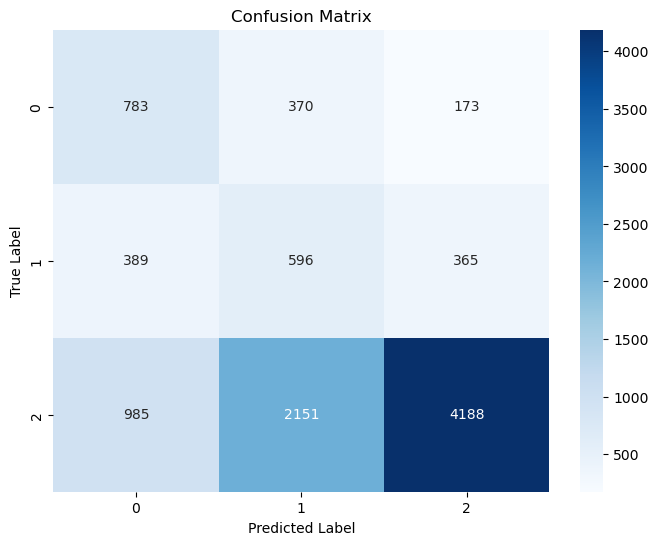

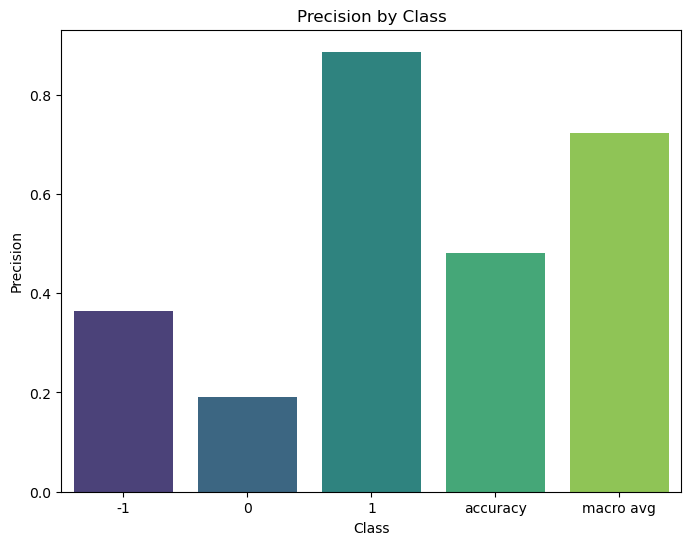

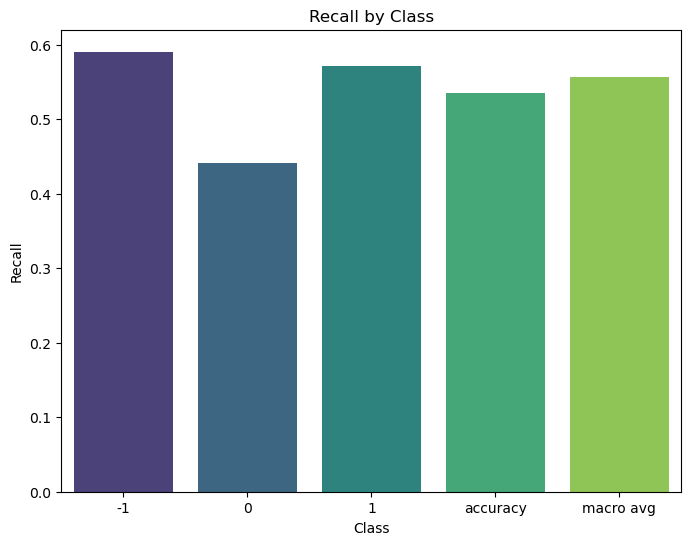

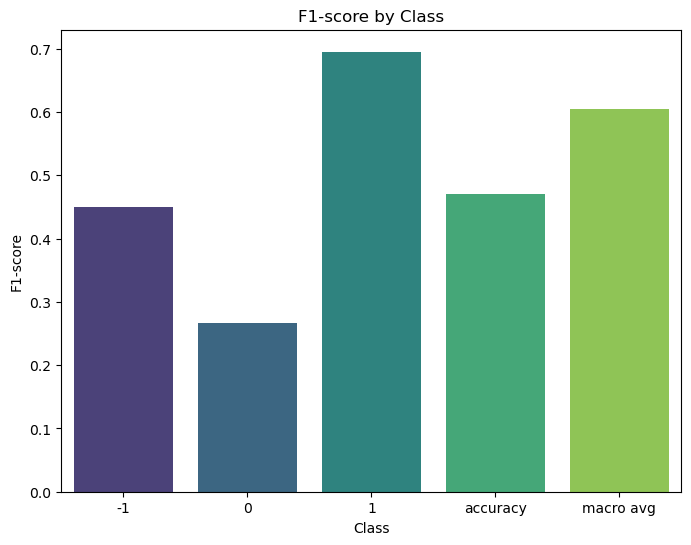

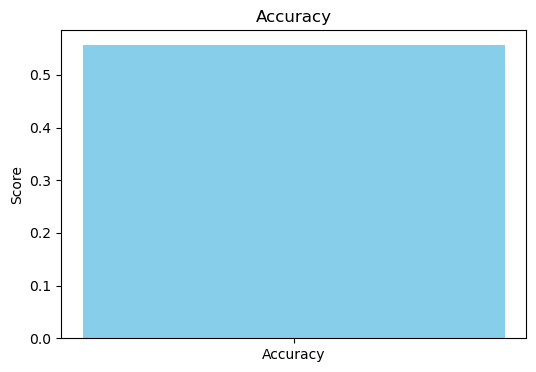

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot classification report metrics
classification_rep = classification_report(y_test, predictions, output_dict=True)
plt.figure(figsize=(8, 6))
sns.barplot(x=list(classification_rep.keys())[:-1], y=[metrics['precision'] for label, metrics in classification_rep.items() if label != 'accuracy'], palette='viridis')
plt.title('Precision by Class')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=list(classification_rep.keys())[:-1], y=[metrics['recall'] for label, metrics in classification_rep.items() if label != 'accuracy'], palette='viridis')
plt.title('Recall by Class')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=list(classification_rep.keys())[:-1], y=[metrics['f1-score'] for label, metrics in classification_rep.items() if label != 'accuracy'], palette='viridis')
plt.title('F1-score by Class')
plt.xlabel('Class')
plt.ylabel('F1-score')
plt.show()

# Plot accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [classification_rep['accuracy']], color='skyblue')
plt.title('Accuracy')
plt.ylabel('Score')
plt.show()


### 5. Sentiment classification using VADER lexicon and method

In [14]:
!pip install vaderSentiment


     ------------------------------------ 126.0/126.0 kB 741.7 kB/s eta 0:00:00


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def calculate_sentiment_scores(text):
    # Get the sentiment scores
    scores = analyzer.polarity_scores(text)
    # Return the compound score
    return scores['compound']

training_df['vader_sentiment_score'] = training_df['reviews'].apply(calculate_sentiment_scores)
development_df['vader_sentiment_score'] = development_df['reviews'].apply(calculate_sentiment_scores)
testing_df['vader_sentiment_score'] = testing_df['reviews'].apply(calculate_sentiment_scores)

def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

training_df['vader_sentiment'] = training_df['vader_sentiment_score'].apply(classify_sentiment)
development_df['vader_sentiment'] = development_df['vader_sentiment_score'].apply(classify_sentiment)
testing_df['vader_sentiment'] = testing_df['vader_sentiment_score'].apply(classify_sentiment)


In [16]:

print("Sentiment Distribution in Training Data:")
print(training_df['vader_sentiment'].value_counts())


Sentiment Distribution in Training Data:
Positive    9120
Negative     832
Neutral       48
Name: vader_sentiment, dtype: int64


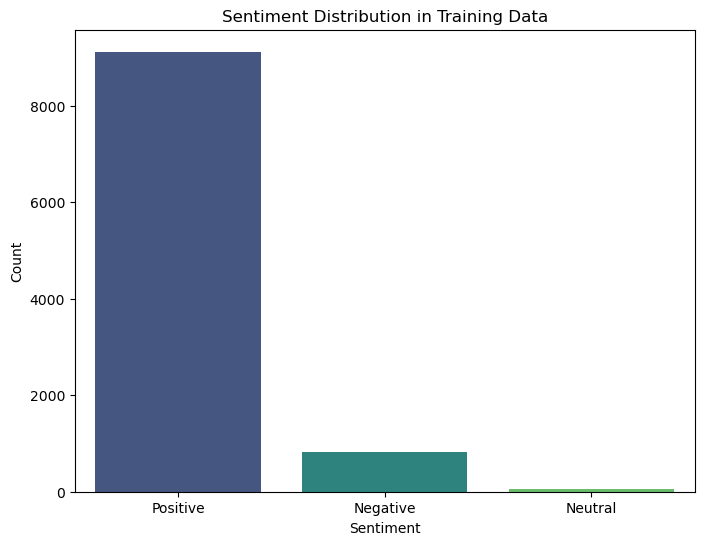

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting sentiment distribution for training data
plt.figure(figsize=(8, 6))
sns.countplot(x='vader_sentiment', data=training_df, palette='viridis')
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


### 6. Combining VADER with the best classifier

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Calculate VADER sentiment scores for each review
training_df['vader_sentiment'] = training_df['reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
development_df['vader_sentiment'] = development_df['reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
testing_df['vader_sentiment'] = testing_df['reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Prepare Features for Machine Learning (including VADER scores)
X_train = training_df[['vader_sentiment']]
y_train = training_df['overall_rating']

X_dev = development_df[['vader_sentiment']]
y_dev = development_df['overall_rating']

X_test = testing_df[['vader_sentiment']]
y_test = testing_df['overall_rating']

# Train Machine Learning Model
model = DecisionTreeClassifier(random_state=102)
model.fit(X_train, y_train)

# Evaluate the Model
predictions = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))
print("\nAccuracy Score:", accuracy_score(y_test, predictions))


Confusion Matrix:
[[   0    0    0    0    1    0]
 [   0  261  115  106   83   77]
 [   0  144  110  119  135  175]
 [   0  134  123  206  401  486]
 [   0   87  107  281 1023 1723]
 [   0   71   99  245 1190 2498]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.37      0.41      0.39       642
         2.0       0.20      0.16      0.18       683
         3.0       0.22      0.15      0.18      1350
         4.0       0.36      0.32      0.34      3221
         5.0       0.50      0.61      0.55      4103

    accuracy                           0.41     10000
   macro avg       0.28      0.27      0.27     10000
weighted avg       0.39      0.41      0.40     10000


Accuracy Score: 0.4098


### 7. Trainig and testing the final method

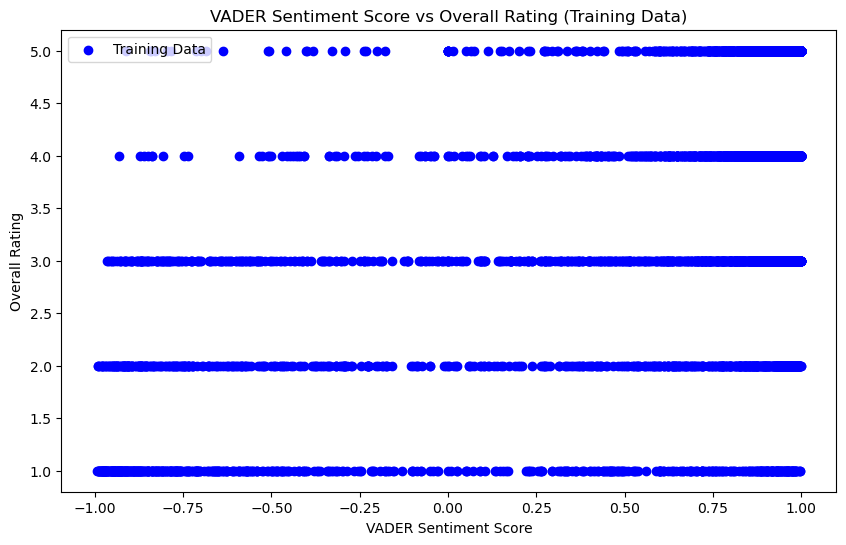

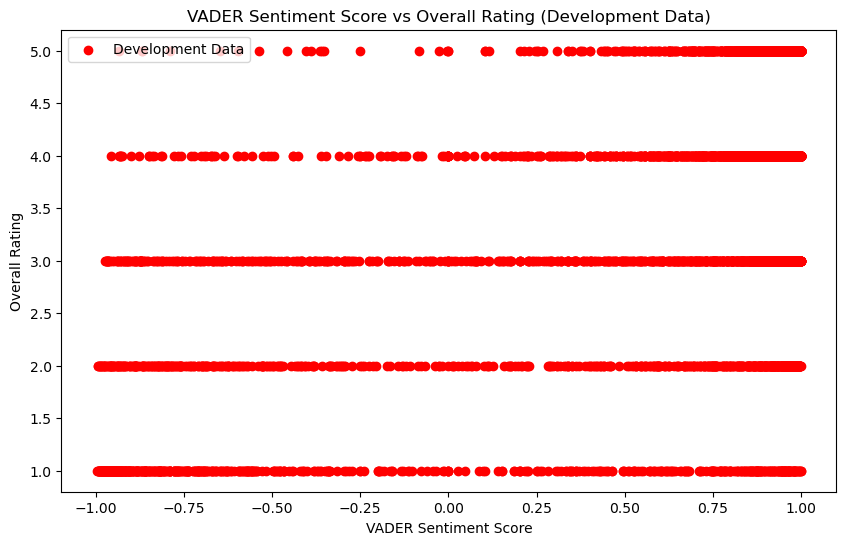

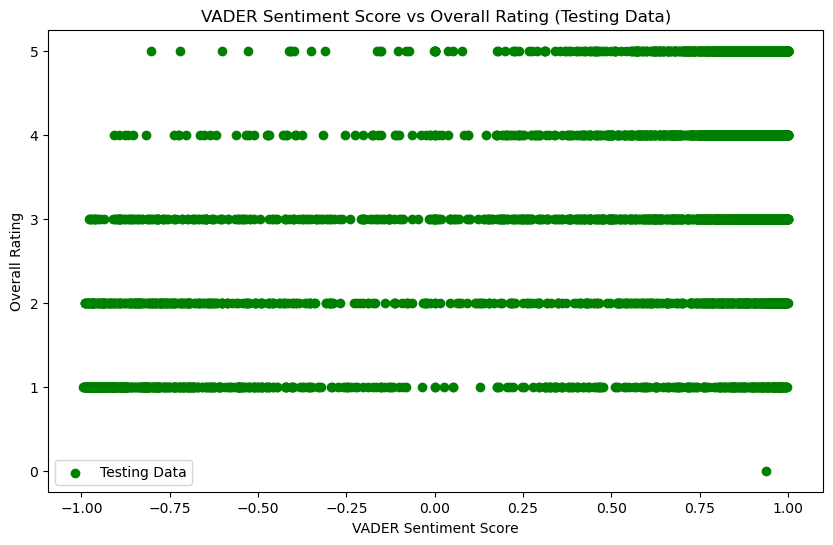

In [20]:
import matplotlib.pyplot as plt

# Scatter plot for training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train['vader_sentiment'], y_train, color='blue', label='Training Data')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Overall Rating')
plt.title('VADER Sentiment Score vs Overall Rating (Training Data)')
plt.legend()
plt.show()

# Scatter plot for development data
plt.figure(figsize=(10, 6))
plt.scatter(X_dev['vader_sentiment'], y_dev, color='red', label='Development Data')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Overall Rating')
plt.title('VADER Sentiment Score vs Overall Rating (Development Data)')
plt.legend()
plt.show()

# Scatter plot for testing data
plt.figure(figsize=(10, 6))
plt.scatter(X_test['vader_sentiment'], y_test, color='green', label='Testing Data')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Overall Rating')
plt.title('VADER Sentiment Score vs Overall Rating (Testing Data)')
plt.legend()
plt.show()


### 8. Reviews aspect prediction

### 9. References

In [21]:
# 1) kenypatel233 (2021). SentimentAnalysis/Sentiment Analysis.ipynb at main · kenypatel233/SentimentAnalysis. [online] GitHub. Available at: https://github.com/kenypatel233/SentimentAnalysis/blob/main/Sentiment%20Analysis.ipynb [Accessed 25 Feb. 2024].

# 2)kaggle.com. (n.d.). Twitter sentiment Extaction-Analysis,EDA and Model. [online] Available at: https://www.kaggle.com/code/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model.

# 3)wrokshop notebook
